# Dataset info
The columns in your dataset represent different features or attributes related to medical data, likely pertaining to patients with heart-related conditions. Here's a brief explanation of each column:

1. **Age:** The age of the patient.
2. **Anaemia:** Indicates whether the patient has anemia (a condition characterized by a lack of healthy red blood cells).
3. **Creatinine_phosphokinase:** Level of the enzyme creatine phosphokinase in the blood, which can indicate heart muscle damage.
4. **Diabetes:** Indicates whether the patient has diabetes.
5. **Ejection_fraction:** Percentage of blood leaving the heart each time it contracts (an indicator of heart function).
6. **High_blood_pressure:** Indicates whether the patient has high blood pressure.
7. **Platelets:** Number of platelets in the blood (important for clotting).
8. **Serum_creatinine:** Level of creatinine in the blood (a waste product generated by muscle metabolism, elevated levels may indicate kidney dysfunction).
9. **Serum_sodium:** Level of sodium in the blood (an electrolyte, abnormal levels may indicate health issues).
10. **Gender/Sex:** Indicates the gender or sex of the patient.
11. **Smoking:** Indicates whether the patient smokes.
12. **Smoking_time:** Duration or frequency of smoking (if applicable).
13. **Death:** Indicates whether the patient has died.

These columns collectively provide information about various health-related factors and can be used for medical analysis, risk assessment, and prediction of patient outcomes.

In [41]:
# library
from warnings import filterwarnings
filterwarnings('ignore')

import os
os.chdir('D:/py/')
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, RandomizedSearchCV

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

from sklearn.tree import plot_tree

In [16]:
df= pd.read_csv("heart_failure_clinical_records_dataset.csv")
df.drop(['Sex'],axis=1,inplace=True)
df.head()

,Age,Anaemia,Creatinine_phosphokinase,Diabetes,Ejection_fraction,High_blood_pressure,Platelets,Serum_creatinine,Serum_sodium,Gender,Smoking,Somking_time,Death
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       299 non-null    float64
 1   Anaemia                   299 non-null    int64  
 2   Creatinine_phosphokinase  299 non-null    int64  
 3   Diabetes                  299 non-null    int64  
 4   Ejection_fraction         299 non-null    int64  
 5   High_blood_pressure       299 non-null    int64  
 6   Platelets                 299 non-null    float64
 7   Serum_creatinine          299 non-null    float64
 8   Serum_sodium              299 non-null    int64  
 9   Gender                    299 non-null    int64  
 10  Smoking                   299 non-null    int64  
 11  Somking_time              299 non-null    int64  
 12  Death                     299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [18]:
df.describe(include='all')

,Age,Anaemia,Creatinine_phosphokinase,Diabetes,Ejection_fraction,High_blood_pressure,Platelets,Serum_creatinine,Serum_sodium,Gender,Smoking,Somking_time,Death
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


In [19]:
df.nunique()

Age                          47
Anaemia                       2
Creatinine_phosphokinase    208
Diabetes                      2
Ejection_fraction            17
High_blood_pressure           2
Platelets                   176
Serum_creatinine             40
Serum_sodium                 27
Gender                        2
Smoking                       2
Somking_time                148
Death                         2
dtype: int64

In [22]:
df.corr()[['Death']].sort_values(by=['Death'] ,ascending=False)

,Death
Death,1.000000
Serum_creatinine,0.294278
Age,0.253729
High_blood_pressure,0.079351
Anaemia,0.066270
Creatinine_phosphokinase,0.062728
Diabetes,-0.001943
Gender,-0.004316
Smoking,-0.012623
Platelets,-0.049139


In [ ]:
#plot

In [25]:
# define
x=df.drop(['Death','Gender'],axis=1)
y=df['Death']

In [29]:
ss=StandardScaler()
con=pd.DataFrame(ss.fit_transform(x),columns=ss.get_feature_names_out())
con

,Age,Anaemia,Creatinine_phosphokinase,Diabetes,Ejection_fraction,High_blood_pressure,Platelets,Serum_creatinine,Serum_sodium,Smoking,Somking_time
0,1.192945,-0.871105,0.000166,-0.847579,-1.530560,1.359272,1.681648e-02,0.490057,-1.504036,-0.687682,-1.629502
1,-0.491279,-0.871105,7.514640,-0.847579,-0.007077,-0.735688,7.535660e-09,-0.284552,-0.141976,-0.687682,-1.603691
2,0.350833,-0.871105,-0.449939,-0.847579,-1.530560,-0.735688,-1.038073e+00,-0.090900,-1.731046,1.454161,-1.590785
3,-0.912335,1.147968,-0.486071,-0.847579,-1.530560,-0.735688,-5.464741e-01,0.490057,0.085034,-0.687682,-1.590785
4,0.350833,1.147968,-0.435486,1.179830,-1.530560,-0.735688,6.517986e-01,1.264666,-4.682176,-0.687682,-1.577879
...,...,...,...,...,...,...,...,...,...,...,...
294,0.098199,-0.871105,-0.537688,1.179830,-0.007077,1.359272,-1.109765e+00,-0.284552,1.447094,1.454161,1.803451
295,-0.491279,-0.871105,1.278215,-0.847579,-0.007077,-0.735688,6.802472e-02,-0.187726,0.539054,-0.687682,1.816357
296,-1.333392,-0.871105,1.525979,1.179830,1.854958,-0.735688,4.902082e+00,-0.575031,0.312044,-0.687682,1.906697
297,-1.333392,-0.871105,1.890398,-0.847579,-0.007077,-0.735688,-1.263389e+00,0.005926,0.766064,1.454161,1.932509


In [31]:
x_train,x_test,y_train,y_test=train_test_split(con,y,test_size=12,random_state=23)

In [35]:
dt=DecisionTreeClassifier(random_state=14)
rdf=RandomForestClassifier(random_state=14)

In [38]:

list1=[rdf,dt]

for i in list1:
    i.fit(x_train,y_train)
    y_pred_train = i.predict(x_train)
    y_pred_test = i.predict(x_test)
    
    acc = accuracy_score(y_pred_train,y_train)
    acc1 = accuracy_score(y_pred_test,y_test)
    
    print(i)
    print('accuracy_score_train = ', acc)
    print('accuracy_score_test = ', acc1) 
    print('--'*30)

RandomForestClassifier(random_state=14)
accuracy_score_train =  1.0
accuracy_score_test =  0.5
------------------------------------------------------------
DecisionTreeClassifier(random_state=14)
accuracy_score_train =  1.0
accuracy_score_test =  0.5833333333333334
------------------------------------------------------------


In [42]:
#tuning
grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': range(1, 100),
    'min_samples_split': range(1, 10),  
    'min_samples_leaf': range(1, 10)
}

# Initialize RandomizedSearchCV
rs = RandomizedSearchCV(dt, param_distributions=grid, cv=3)

# Fit the RandomizedSearchCV instance
rs.fit(x_train, y_train)

# Get the best parameters
best_params = rs.best_params_
print("Best Parameters:", best_params)

# Get the best estimator
dt1 = rs.best_estimator_
print("Best Estimator:", dt1)

Best Parameters: {'min_samples_split': 3, 'min_samples_leaf': 5, 'max_depth': 1, 'criterion': 'entropy'}
Best Estimator: DecisionTreeClassifier(criterion='entropy', max_depth=1, min_samples_leaf=5,
                       min_samples_split=3, random_state=14)


In [43]:
list1=[dt,dt1]

for i in list1:
    i.fit(x_train,y_train)
    y_pred_train = i.predict(x_train)
    y_pred_test = i.predict(x_test)
    
    acc = accuracy_score(y_pred_train,y_train)
    acc1 = accuracy_score(y_pred_test,y_test)
    
    print(i)
    print('accuracy_score_train = ', acc)
    print('accuracy_score_test = ', acc1) 
    print('--'*30)

DecisionTreeClassifier(random_state=14)
accuracy_score_train =  1.0
accuracy_score_test =  0.5833333333333334
------------------------------------------------------------
DecisionTreeClassifier(criterion='entropy', max_depth=1, min_samples_leaf=5,
                       min_samples_split=3, random_state=14)
accuracy_score_train =  0.8571428571428571
accuracy_score_test =  0.5833333333333334
------------------------------------------------------------


DecisionTreeClassifier(random_state=14)


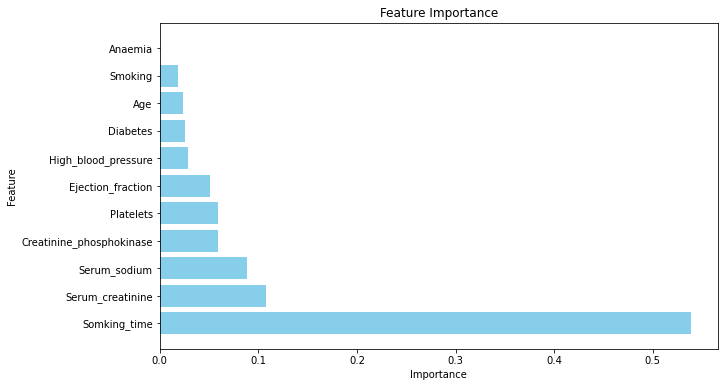

In [58]:
feature_imp = dt.feature_importances_

# Create a DataFrame to store feature importances
importance_df = pd.DataFrame({"Feature": x.columns, "Importance": feature_imp})

# Sort the DataFrame by feature importance
importance_df = importance_df.sort_values(by="Importance", ascending=False)
print(dt)
# Plot feature importances
plt.figure(figsize=(10, 6))
plt.barh(importance_df["Feature"], importance_df["Importance"], color="skyblue")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.title("Feature Importance")
plt.show()

DecisionTreeClassifier(criterion='entropy', max_depth=1, min_samples_leaf=5,
                       min_samples_split=3, random_state=14)


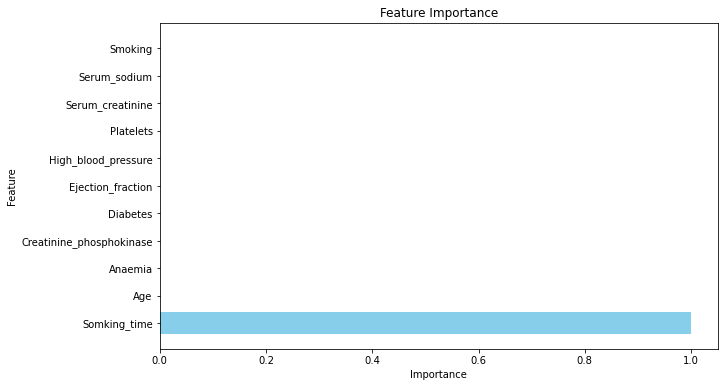

In [57]:
feature_imp1 = dt1.feature_importances_

# Create a DataFrame to store feature importances
importance_df = pd.DataFrame({"Feature": x.columns, "Importance": feature_imp1})

# Sort the DataFrame by feature importance
importance_df = importance_df.sort_values(by="Importance", ascending=False)
print(dt1)
# Plot feature importances
plt.figure(figsize=(10, 6))
plt.barh(importance_df["Feature"], importance_df["Importance"], color="skyblue")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.title("Feature Importance")
plt.show()

RandomForestClassifier(random_state=14)


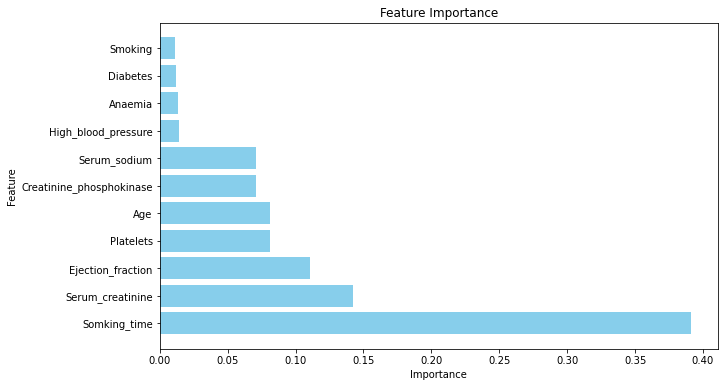

In [56]:
feature_imp2 = rdf.feature_importances_

# Create a DataFrame to store feature importances
importance_df = pd.DataFrame({"Feature": x.columns, "Importance": feature_imp2})

# Sort the DataFrame by feature importance
importance_df = importance_df.sort_values(by="Importance", ascending=False)
print(rdf)
# Plot feature importances
plt.figure(figsize=(10, 6))
plt.barh(importance_df["Feature"], importance_df["Importance"], color="skyblue")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.title("Feature Importance")
plt.show()

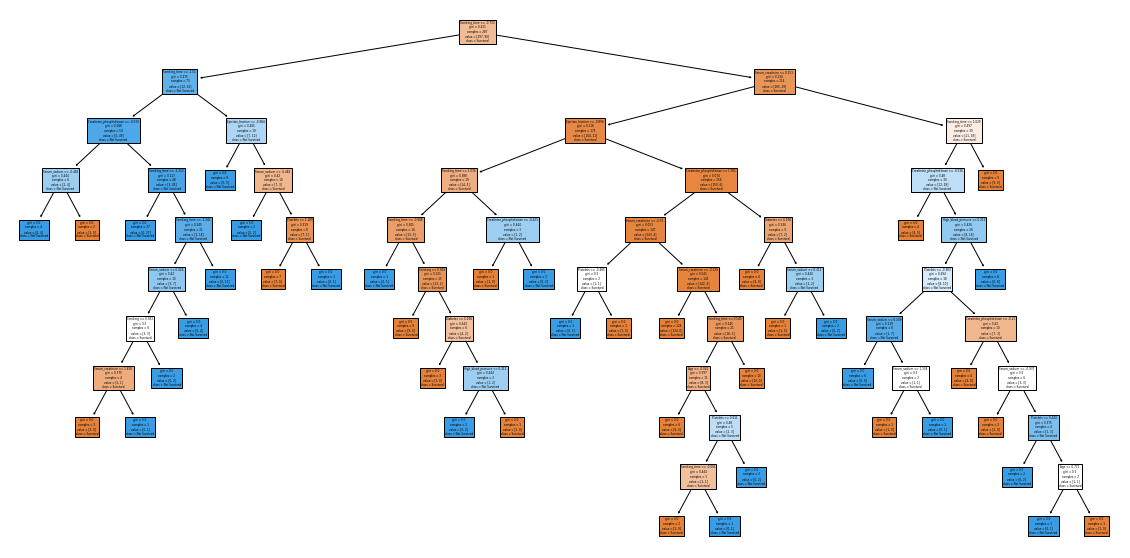

In [45]:


# Visualize the decision tree
plt.figure(figsize=(20,10))
plot_tree(dt, feature_names=x.columns, class_names=['Survived', 'Not Survived'], filled=True)
plt.show()

In [131]:
def h_death(preprocess, model):
    # Collect user input
    Age = float(input("Age = "))
    Anaemia = int(input("Anaemia = "))
    Creatinine_phosphokinase = int(input("Creatinine_phosphokinase = "))
    Diabetes = int(input("Diabetes = "))
    Ejection_fraction = int(input("Ejection_fraction = "))
    High_blood_pressure = int(input("High_blood_pressure = "))
    Platelets = float(input("Platelets = "))
    Serum_creatinine = float(input("Serum_creatinine = "))
    Serum_sodium = int(input("Serum_sodium = "))
    Smoking = int(input("Smoking = "))
    Somking_time = int(input("Somking_time = "))

    # Create input DataFrame
    heart_data = pd.DataFrame({
        "Age": [Age],
        "Anaemia": [Anaemia],
        "Creatinine_phosphokinase": [Creatinine_phosphokinase],
        "Diabetes": [Diabetes],
        "Ejection_fraction": [Ejection_fraction],
        "High_blood_pressure": [High_blood_pressure],
        "Platelets": [Platelets],
        "Serum_creatinine": [Serum_creatinine],
        "Serum_sodium": [Serum_sodium],
        "Smoking": [Smoking],
        "Somking_time": [Somking_time]
    })

    # Preprocess input data
    preprocessed_data = preprocess.transform(heart_data)

    # Predict death
    prediction = model.predict(preprocessed_data)

    # Add prediction to DataFrame
    heart_data['Death'] = prediction
    
    bins = (0, 1, 2)  # Define the bin boundaries, ensuring that there are enough bins for the labels
    group_names = ['Dead', 'Normal']  # Define the corresponding labels for the bins
    heart_data['Death_p'] = pd.cut(heart_data['Death'], bins=bins, labels=group_names, right=False)

    return heart_data


In [132]:
h_death(ss,dt)

Age = 1
Anaemia = 2
Creatinine_phosphokinase = 1
Diabetes = 2
Ejection_fraction = 1
High_blood_pressure = 2
Platelets = 1
Serum_creatinine = 2
Serum_sodium = 1
Smoking = 2
Somking_time = 1


(   Age  Anaemia  Creatinine_phosphokinase  Diabetes  Ejection_fraction  \
 0  1.0        2                         1         2                  1   
 
    High_blood_pressure  Platelets  Serum_creatinine  Serum_sodium  Smoking  \
 0                    2        1.0               2.0             1        2   
 
    Somking_time  Death Death_p  
 0             1      1  Normal  ,
 0    1
 Name: Death, dtype: int64)

## 